In [1]:
# Part 1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")


In [2]:
# Part 2 - Load Titanic datasets
train_df = pd.read_csv(r"D:\Elevate Labs\titanic\train.csv")
test_df = pd.read_csv(r"D:\Elevate Labs\titanic\test.csv")
gender_submission_df = pd.read_csv(r"D:\Elevate Labs\titanic\gender_submission.csv")

# Make a working copy from train data
df = train_df.copy()


In [3]:
# Part 3 - View first rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Dataset Description
df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Value counts for categorical columns
print("Sex counts:\n", df['Sex'].value_counts())
print("\nEmbarked counts:\n", df['Embarked'].value_counts())



Sex counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# Check missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18532\331093014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


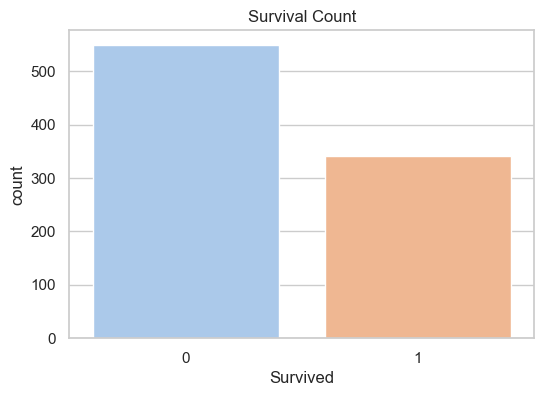

In [8]:
# Survival Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.show()


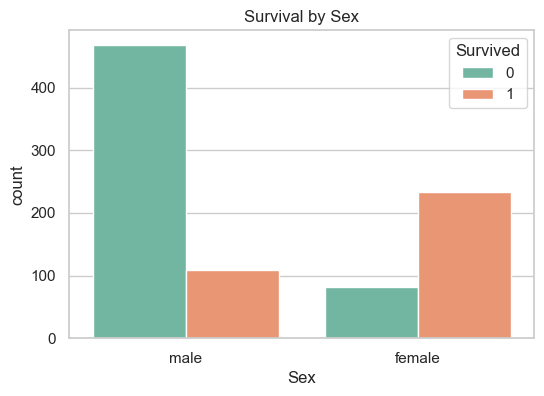

In [9]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Sex')
plt.show()


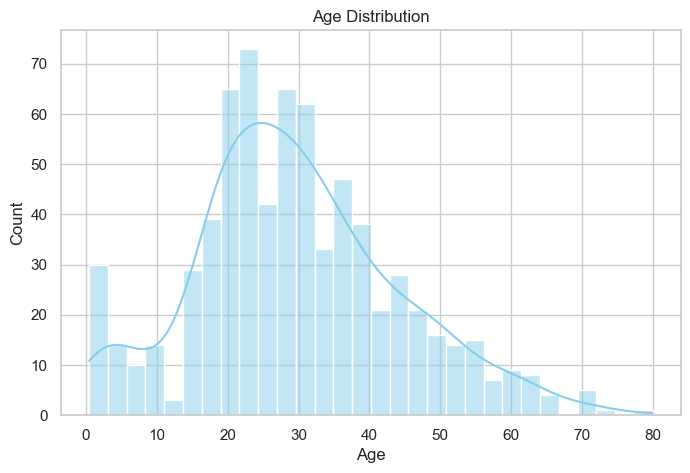

In [10]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()


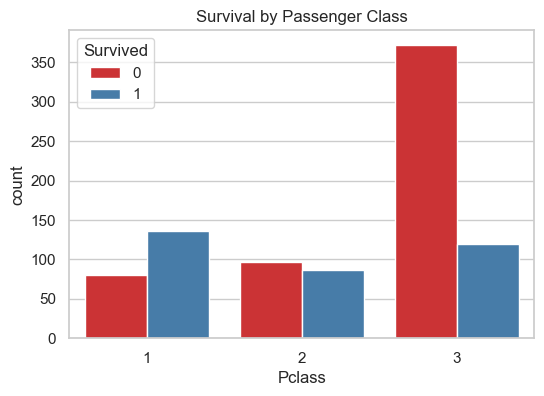

In [11]:
# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.show()


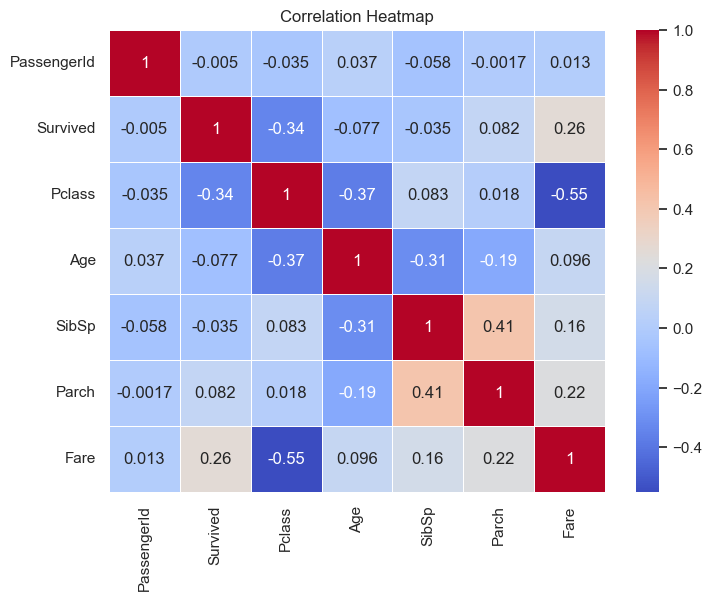

In [12]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


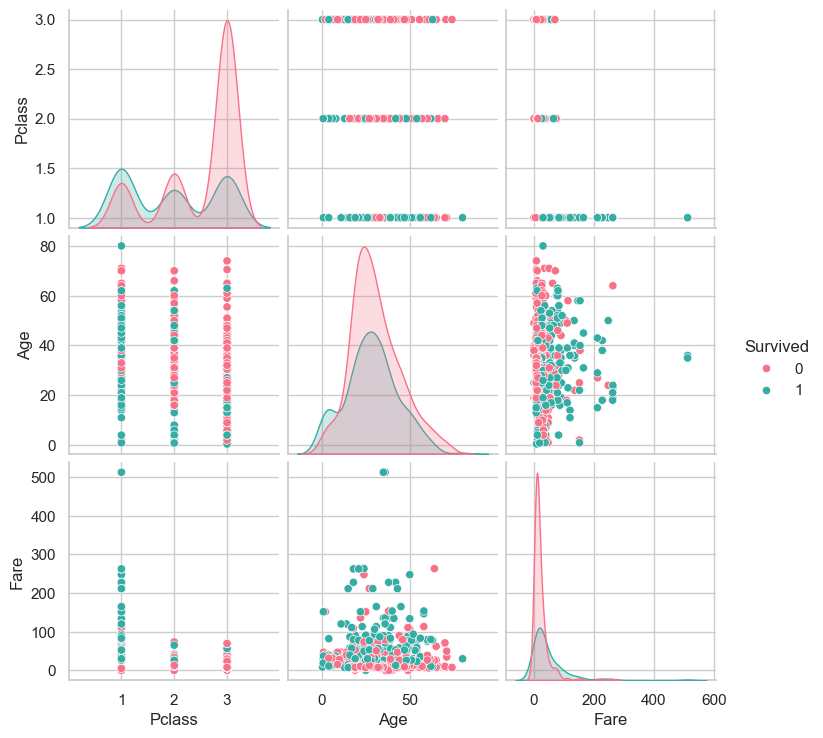

In [13]:
# Pairplot for some features
sns.pairplot(df[['Survived','Pclass','Age','Fare']], hue='Survived', palette='husl')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18532\189395899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Age', palette='pastel')


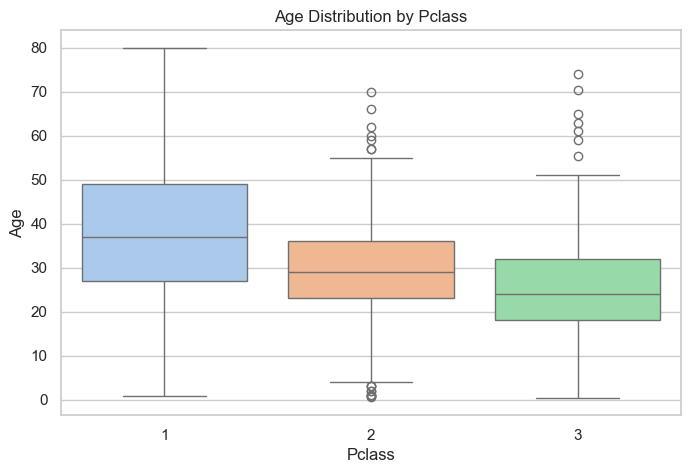

In [14]:
# Age vs Pclass
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Pclass', y='Age', palette='pastel')
plt.title('Age Distribution by Pclass')
plt.show()


In [15]:
# Key Observations
observations = """
1. Females had a higher survival rate compared to males.
2. Passengers in 1st class were more likely to survive than those in 3rd class.
3. Younger passengers tended to survive more, but there were exceptions.
4. Fare is negatively correlated with Pclass.
5. Missing values mainly in Age, Cabin, and Embarked.
"""
print(observations)



1. Females had a higher survival rate compared to males.
2. Passengers in 1st class were more likely to survive than those in 3rd class.
3. Younger passengers tended to survive more, but there were exceptions.
4. Fare is negatively correlated with Pclass.
5. Missing values mainly in Age, Cabin, and Embarked.

